In [2]:
import pandas as pd

# Scrape FTSE 100 constituents from Wikipedia
url = "https://en.wikipedia.org/wiki/FTSE_100_Index"
tables = pd.read_html(url)
ftse_table = tables[4]  # Constituents table (check index if it changes)
ftse_table = ftse_table.rename(columns={'FTSE industry classification benchmark sector[36]': 'Sector'})

#ftse_table.head()
# Keep relevant columns (Company, Ticker, Sector)
ftse_constituents = ftse_table[["Company", "Ticker", "Sector"]]
#ftse_constituents["Ticker"] = ftse_constituents["Ticker"] + ".L"  # Yahoo Finance uses .L for LSE

ftse_constituents.head()
ftse_constituents.to_csv('ftse_100_constituents.csv', index = False)

In [ ]:
import yfinance as yf

# Define time period
start_date = "2020-01-01"
end_date = "2025-05-31"

# Download data for all constituents
ls = []
for ticker in ftse_constituents["Ticker"]:
    file_path = 'ftse_100_data/'
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(file_path+ticker+'.csv')
    data = yf.download(ticker+".L", start=start_date, end=end_date)
    data.to_csv(file_path+ticker+'.csv')
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2023-12-31)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ANTO']: HTTPError('HTTP Error 404: ')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ABF']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2023-12-31)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 F

NameError: name 'prices' is not defined

# Load in the data into one time Series

In [10]:
import os
import pandas as pd

# Directory containing the CSV files
data_dir = 'ftse_100_data'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Dictionary to hold closing prices
close_prices = {}

for file in csv_files:
    ticker = file.replace('.csv', '')
    df = pd.read_csv(os.path.join(data_dir, file))
    if 'Close' in df.columns:
        close_prices[ticker] = df['Close']

# Combine into a DataFrame (dates as index, tickers as columns)
close_df = pd.DataFrame(close_prices)

#close_df.dropna(inplace=True, axis = 1)  # Drop rows with any NaN values
close_df = close_df.T.iloc[:, 2:]
close_df

2                   3                   4     \
AAF    78.70117950439453   78.40155792236328   78.35163116455078   
KGF   220.73309326171875   218.5377655029297  219.13650512695312   
DPLM  2040.2799072265625  2018.2984619140625       2006.30859375   
SN     1829.019287109375  1844.4981689453125   1809.545654296875   
PSON   649.0307006835938    642.041259765625   633.8535766601562   
...                  ...                 ...                 ...   
WTB        4202.48828125    4175.87939453125      4121.802734375   
SVT    2509.218017578125     2510.2158203125   2492.257080078125   
BAB    630.9102783203125   612.9129028320312   628.3107299804688   
IMI    1192.680908203125  1180.1949462890625   1178.696533203125   
IMB   1867.7576904296875  1913.7542724609375    1902.60400390625   

                    5                   6                   7     \
AAF     79.2005615234375   77.65250396728516   77.50267791748047   
KGF   227.51876831054688   223.5271759033203   217.0408935546875   
DPLM  2004.3101806640625    1988.32373046875   1994.318603515625   
SN      1830.01806640625    1830.01806640625  1844.4981689453125   
PSON   641.8416137695312   634.4525756835938   624.0681762695312   
...                  ...                 ...                 ...   
WTB     4115.79443359375    4066.01025390625    4052.27685546875   
SVT     2468.31201171875    2465.31884765625     2476.2939453125   
BAB    646.5081787109375   640.9088745117188    643.108642578125   
IMI         1165.7109375  1154.2235107421875    1166.21044921875   
IMB   1938.6448974609375    1961.74267578125  1956.7647705078125   

                    8                  9                   10    \
AAF    75.55513000488281  74.90594482421875   74.75614166259766   
KGF   209.95587158203125  213.5482940673828  218.03880310058594   
DPLM  1928.3741455078125  1906.392822265625   1899.398681640625   
SN    1863.4725341796875  1866.468505859375   1872.959716796875   
PSON   626.8638305664062  624.6671752929688    604.097900390625   
...                  ...                ...                 ...   
WTB    3990.475830078125  4042.835205078125      4102.060546875   
SVT    2453.346923828125  2512.211181640625   2515.204345703125   
BAB    635.9096069335938   638.309326171875   632.5100708007812   
IMI     1161.71533203125  1171.704345703125  1176.1993408203125   
IMB    1951.388916015625  1963.734130859375  1980.0618896484375   

                    11    ...               1357                1358  \
AAF    72.90845489501953  ...  177.1999969482422  179.39999389648438   
KGF    213.5482940673828  ...  310.7137451171875   313.4129943847656   
DPLM   1845.444091796875  ...    4203.8369140625        4221.8359375   
SN     1887.440185546875  ...             1087.0              1103.5   
PSON   617.4779663085938  ...             1198.5              1201.0   
...                  ...  ...                ...                 ...   
WTB     4151.84521484375  ...  2829.402099609375   2841.399658203125   
SVT    2540.146240234375  ...   2673.28271484375   2699.275634765625   
BAB    618.7120971679688  ...              848.0               856.0   
IMI   1170.2059326171875  ...             1976.0              1983.0   
IMB     2016.10302734375  ...  2755.607177734375    2818.59814453125   

                   1359               1360                1361  \
AAF   180.6999969482422              182.5  181.10000610351562   
KGF   313.8128662109375  309.8139953613281               300.0   
DPLM    4859.8115234375   4873.81103515625    4763.81494140625   
SN               1080.0             1061.0              1063.0   
PSON             1215.5             1217.0              1218.5   
...                 ...                ...                 ...   
WTB   2899.387451171875   2868.39404296875              2790.0   
SVT   2712.272216796875  2774.255615234375   2741.264404296875   
BAB               860.0              890.0               895.0   
IMI              1987.0             1961.0              

In [11]:
close_df = close_df.apply(pd.to_numeric, errors='coerce').astype('float64')

In [12]:
close_df = close_df.pct_change(axis= 1).iloc[:, 1:]#.to_csv('ftse_100_returns.csv', index=True)

/tmp/ipykernel_1200585/4122405138.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  close_df = close_df.pct_change(axis= 1).iloc[:, 1:]#.to_csv('ftse_100_returns.csv', index=True)


In [13]:
close_df

3         4         5         6         7         8         9     \
AAF  -0.003807 -0.000637  0.010835 -0.019546 -0.001929 -0.025129 -0.008592   
KGF  -0.009946  0.002740  0.038251 -0.017544 -0.029018 -0.032644  0.017110   
DPLM -0.010774 -0.005941 -0.000996 -0.007976  0.003015 -0.033066 -0.011399   
SN    0.008463 -0.018950  0.011314  0.000000  0.007913  0.010287  0.001608   
PSON -0.010769 -0.012753  0.012602 -0.011512 -0.016367  0.004480 -0.003504   
...        ...       ...       ...       ...       ...       ...       ...   
WTB  -0.006332 -0.012950 -0.001458 -0.012096 -0.003378 -0.015251  0.013121   
SVT   0.000398 -0.007154 -0.009608 -0.001213  0.004452 -0.009267  0.023993   
BAB  -0.028526  0.025122  0.028962 -0.008661  0.003432 -0.011194  0.003774   
IMI  -0.010469 -0.001270 -0.011017 -0.009854  0.010385 -0.003854  0.008599   
IMB   0.024627 -0.005826  0.018943  0.011914 -0.002537 -0.002747  0.006326   

          10        11        12    ...      1357      1358      1359  \
AAF  -0.002000 -0.024716 -0.056849  ...  0.007964  0.012415  0.007246   
KGF   0.021028 -0.020595 -0.019159  ... -0.016767  0.008687  0.001276   
DPLM -0.003669 -0.028406  0.028695  ...  0.001907  0.004282  0.151113   
SN    0.003478  0.007731 -0.008466  ...  0.000921  0.015179 -0.021296   
PSON -0.032928  0.022149 -0.088939  ... -0.000834  0.002086  0.012073   
...        ...       ...       ...  ...       ...       ...       ...   
WTB   0.014649  0.012137 -0.051685  ... -0.001059  0.004240  0.020408   
SVT   0.001191  0.009916  0.007070  ...  0.013647  0.009723  0.004815   
BAB  -0.009085 -0.021815 -0.014544  ...  0.011330  0.009434  0.004673   
IMI   0.003836 -0.005096  0.005975  ...  0.008163  0.003543  0.002017   
IMB   0.008315  0.018202  0.004197  ...  0.019231  0.022859 -0.002838   

          1360      1361      1362      1363      1364      1365      1366  
AAF   0.009961 -0.007671 -0.008283 -0.003898 -0.012856  0.006795 -0.006749  
KGF  -0.012743 -0.031677 -0.015667  0.001693 -0.035497 -0.021381 -0.005731  
DPLM  0.002881 -0.022569 -0.022670  0.015893 -0.008457  0.000465 -0.001279  
SN   -0.017593  0.001885  0.008937 -0.007459  0.004227  0.005145  0.000000  
PSON  0.001234  0.001233 -0.005334 -0.009488 -0.011662 -0.008007 -0.010195  
...        ...       ...       ...       ...       ...       ...       ...  
WTB  -0.010690 -0.027330  0.003226  0.017149 -0.004215  0.001058  0.019732  
SVT   0.022853 -0.011892 -0.001094 -0.000730 -0.005480 -0.022515  0.016165  
BAB   0.034884  0.005618  0.008939  0.018826  0.009239 -0.005924  0.014085  
IMI  -0.013085 -0.013259 -0.003618  0.010373  0.000513  0.007696  0.012220  
IMB  -0.016224  0.018445  0.001420 -0.011702  0.000359  0.007891  0.000000  

[100 rows x 1364 columns]

In [14]:
close_df.to_csv('/yunity/arusty/PF-GAP/data/ftse_100_close_prices.csv', index=True)

In [15]:
# Get the sectors data that correlates with the tickers
ftse_constituents = pd.read_csv('ftse_100_constituents.csv')
ftse_constituents = ftse_constituents.set_index('Ticker')
ftse_constituents = ftse_constituents.loc[close_df.index]
ftse_constituents

Company                                            Sector
AAF           Airtel Africa                       Telecommunications services
KGF          Kingfisher plc                                         Retailers
DPLM                Diploma                       Industrial Support services
SN           Smith & Nephew                  Health care equipment & supplies
PSON            Pearson plc                                             Media
...                     ...                                               ...
WTB               Whitbread                                Retail hospitality
SVT            Severn Trent                               Multiline utilities
BAB   Babcock International                               Aerospace & defence
IMI                     IMI  Machinery, tools, heavy vehicles, trains & ships
IMB         Imperial Brands                                           Tobacco

[100 rows x 2 columns]

In [16]:
labels = ftse_constituents["Sector"]
labels

AAF                          Telecommunications services
KGF                                            Retailers
DPLM                         Industrial Support services
SN                      Health care equipment & supplies
PSON                                               Media
                              ...                       
WTB                                   Retail hospitality
SVT                                  Multiline utilities
BAB                                  Aerospace & defence
IMI     Machinery, tools, heavy vehicles, trains & ships
IMB                                              Tobacco
Name: Sector, Length: 100, dtype: object

In [17]:
labels.to_csv('/yunity/arusty/PF-GAP/data/ftse_100_sectors.csv', index=False)

<Axes: xlabel='Sector'>

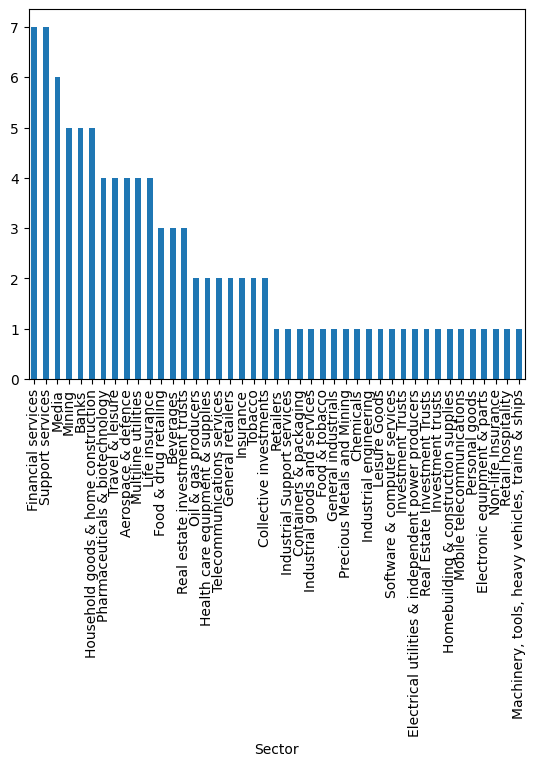

In [18]:
labels.value_counts().plot(kind='bar')